In [ ]:
import requests
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import re

API_TOKEN = 'xxx'

BASE_URL = 'https://web-api.tp.entsoe.eu/api'

BIDDING_ZONE_NL = '10YNL----------L'  # Bidding zone for Netherlands

# Function to fetch installed capacity data from ENTSO-E
def fetch_installed_capacity(api_token, start_date, end_date, bidding_zone=BIDDING_ZONE_NL):
    params = {
        'securityToken': api_token,
        'documentType': 'A68',  # Installed Generation Capacity Aggregated
        'processType': 'A33',   # Yearly process
        'in_Domain': bidding_zone,
        'periodStart': start_date,
        'periodEnd': end_date
    }
    response = requests.get(BASE_URL, params=params)
    if response.status_code == 200:
        print("Data Retrieved Successfully")
        return response.text
    else:
        raise Exception(f"Failed to fetch data: {response.status_code} - {response.text}")


def get_namespace(element):
    m = re.match(r'\{.*\}', element.tag)
    return m.group(0) if m else ''


def parse_installed_capacity(xml_data):
    root = ET.fromstring(xml_data)
    namespace = get_namespace(root)
    ns = {'ns': namespace[1:-1]}

    data = []
    for time_series in root.findall('.//ns:TimeSeries', ns):

        production_type = time_series.find('.//ns:psrType', ns).text
        capacity = float(time_series.find('.//ns:quantity', ns).text)

        data.append({
            'Production Type': production_type,
            'Installed Capacity (MW)': capacity
        })
    return pd.DataFrame(data)



def map_psr_type_labels(df):
    psr_type_mapping = {
        'B01': 'Biomass',
        'B02': 'Fossil Brown Coal/Lignite',
        'B03': 'Fossil Coal-derived Gas',
        'B04': 'Fossil Gas',
        'B05': 'Fossil Hard Coal',
        'B06': 'Fossil Oil',
        'B07': 'Fossil Oil Shale',
        'B08': 'Fossil Peat',
        'B09': 'Geothermal',
        'B10': 'Hydro Pumped Storage',
        'B11': 'Hydro Run-of-river and Poundage',
        'B12': 'Hydro Water Reservoir',
        'B13': 'Marine',
        'B14': 'Nuclear',
        'B15': 'Other Renewable',
        'B16': 'Solar',
        'B17': 'Waste',
        'B18': 'Wind Offshore',
        'B19': 'Wind Onshore',
        'B20': 'Other',
        'B25': 'Energy Storage'
    }

    # Map the codes to readable labels
    df['Production Type'] = df['Production Type'].map(psr_type_mapping).fillna(df['Production Type'])
    return df



def plot_installed_capacity(df):
    df = map_psr_type_labels(df)
    df = df.sort_values('Installed Capacity (MW)', ascending=False)
    plt.figure(figsize=(10, 6))
    plt.barh(df['Production Type'], df['Installed Capacity (MW)'], color='dodgerblue')
    plt.xlabel('Installed Capacity (MW)')
    plt.title('Installed Generation Capacity per Production Type in the Netherlands')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()



Data Retrieved Successfully


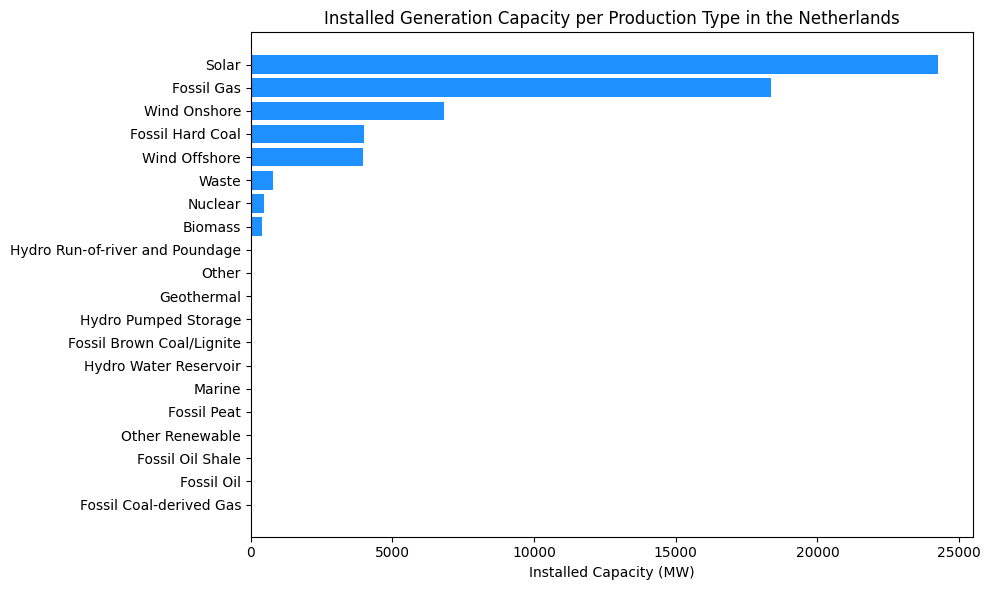

In [28]:

START_DATE = '202401010000'  # Start of the year
END_DATE = '202412312359'    # End of the year

# Fetch the data
xml_data = fetch_installed_capacity(API_TOKEN, START_DATE, END_DATE)

# print(xml_data)

# Parse the data into DataFrame
capacity_df = parse_installed_capacity(xml_data)



# # Plot the data
plot_installed_capacity(capacity_df)

Production Type
Biomass                              415.0
Fossil Brown Coal/Lignite              0.0
Fossil Coal-derived Gas                0.0
Fossil Gas                         18351.0
Fossil Hard Coal                    4006.0
Fossil Oil                             0.0
Fossil Oil Shale                       0.0
Fossil Peat                            0.0
Geothermal                             0.0
Hydro Pumped Storage                   0.0
Hydro Run-of-river and Poundage       38.0
Hydro Water Reservoir                  0.0
Marine                                 0.0
Nuclear                              486.0
Other                                  1.0
Other Renewable                        0.0
Solar                              24261.0
Waste                                786.0
Wind Offshore                       3978.0
Wind Onshore                        6812.0
Name: Installed Capacity (MW), dtype: float64